In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [100]:
dfem = pd.read_csv('estaticos_market.csv', index_col = 0)
dfp1 = pd.read_csv('estaticos_portfolio1.csv', index_col = 0)
dfp2 = pd.read_csv('estaticos_portfolio2.csv', index_col = 0)
dfp3 = pd.read_csv('estaticos_portfolio3.csv', index_col = 0)

In [101]:
colunas_para_tirar = ['qt_funcionarios_24meses', 'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade', 'max_meses_servicos', 
'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses', 'media_meses_servicos_all', 'max_meses_servicos_all', 'min_meses_servicos_all', 
'media_meses_servicos', 'qt_admitidos_12meses', 'meses_ultima_contratacaco', 'qt_desligados_12meses', 'qt_desligados', 'qt_admitidos', 
'grau_instrucao_macro_escolaridade_media', 'grau_instrucao_macro_escolaridade_superior', 'grau_instrucao_macro_desconhecido', 'total', 'idade_de_54_a_58', 
'idade_acima_de_58', 'grau_instrucao_macro_analfabeto', 'grau_instrucao_macro_escolaridade_fundamental', 'idade_de_34_a_38', 'idade_de_39_a_43', 
'idade_de_44_a_48', 'idade_de_49_a_53', 'idade_ate_18', 'idade_de_19_a_23', 'idade_de_24_a_28','idade_de_29_a_33', 'vl_total_tancagem', 'vl_total_veiculos_antt',
'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
'vl_potenc_cons_oleo_gas', 'de_indicador_telefone','qt_coligados_atividade_mt_baixo', 'qt_coligados_atividade_inativo', 'vl_frota','qt_socios_pep', 
'qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj',
'qt_alteracao_socio_365d', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_coligados', 'qt_socios_coligados',
'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 
'qt_coligados_nula', 'idade_media_coligadas', 'idade_maxima_coligadas', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 
'vl_idade_minima_socios_pj', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 
'coligada_mais_nova_baixada', 'coligada_mais_antiga_baixada', 'idade_media_coligadas_baixadas', 'qt_coligados_sa', 'qt_coligados_me', 'qt_coligados_mei', 
'qt_coligados_ltda', 'qt_coligados_epp', 'qt_coligados_norte', 'qt_coligados_sul', 'qt_coligados_nordeste', 'qt_coligados_centro', 'qt_coligados_sudeste', 
'qt_coligados_exterior', 'qt_ufs_coligados', 'qt_regioes_coligados', 'qt_ramos_coligados', 'qt_ramos_coligados', 'qt_coligados_industria', 
'qt_coligados_agropecuaria', 'qt_coligados_comercio', 'qt_coligados_serviço', 'qt_coligados_ccivil', 'qt_funcionarios_coligados', 
'qt_funcionarios_coligados_gp', 'media_funcionarios_coligados_gp', 'max_funcionarios_coligados_gp', 'min_funcionarios_coligados_gp', 'vl_folha_coligados', 
'media_vl_folha_coligados', 'max_vl_folha_coligados', 'min_vl_folha_coligados', 'vl_folha_coligados_gp', 'media_vl_folha_coligados_gp', 
'max_vl_folha_coligados_gp', 'min_vl_folha_coligados_gp', 'faturamento_est_coligados', 'media_faturamento_est_coligados', 'max_faturamento_est_coligados', 
'min_faturamento_est_coligados', 'faturamento_est_coligados_gp', 'media_faturamento_est_coligados_gp', 'max_faturamento_est_coligados_gp', 
'min_faturamento_est_coligados_gp', 'total_filiais_coligados', 'media_filiais_coligados', 'max_filiais_coligados', 'min_filiais_coligados', 
'qt_coligados_atividade_alto', 'qt_coligadas', 'sum_faturamento_estimado_coligadas', 'qt_ex_funcionarios', 'qt_funcionarios_grupo', 'percent_func_genero_masc', 
'percent_func_genero_fem', 'qt_coligados_atividade_medio', 'qt_coligados_atividade_baixo', 'dt_situacao', 'nm_segmento', 'nu_meses_rescencia', 
'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao', 'nm_micro_regiao']

In [102]:
dfem.drop(colunas_para_tirar, axis = 1, inplace = True)
dfp1.drop(colunas_para_tirar, axis = 1, inplace = True)

In [103]:
values_dfem = {'setor': 'S/ setor', 'nm_divisao': 'S/ divisão', 'sg_uf_matriz': 'MA', 'de_saude_rescencia': 'ACIMA DE 1 ANO', 'de_nivel_atividade': 'MEDIA',
         'de_faixa_faturamento_estimado': 'DE R$ 81.000,01 A R$ 360.000,00', 'de_faixa_faturamento_estimado_grupo': 'DE R$ 81.000,01 A R$ 360.000,00',
         'fl_spa': False, 'fl_antt': False, 'fl_veiculo': False, 'fl_simples_irregular': False, 'fl_passivel_iss': True, 
         'vl_total_veiculos_pesados_grupo': round(dfem['vl_total_veiculos_pesados_grupo'].mean(), 0),
         'vl_total_veiculos_leves_grupo': round(dfem['vl_total_veiculos_leves_grupo'].mean(), 0),
         'qt_socios': round(dfem['qt_socios'].mean(), 0), 'qt_socios_pf': round(dfem['qt_socios_pf'].mean(), 0),
         'qt_socios_pj': round(dfem['qt_socios_pj'].mean(), 0), 'idade_media_socios': float(round(dfem['idade_media_socios'].mode(), 0)),
         'idade_maxima_socios': float(round(dfem['idade_maxima_socios'].mode(), 0)), 'idade_minima_socios': float(round(dfem['idade_minima_socios'].mode(), 0)),
         'qt_socios_st_regular': float(round(dfem['qt_socios_st_regular'].mode(), 0)), 
         'vl_faturamento_estimado_aux': float(round(dfem['vl_faturamento_estimado_aux'].mode(), 0)),
         'vl_faturamento_estimado_grupo_aux': float(round(dfem['vl_faturamento_estimado_grupo_aux'].mode(), 0))}

#fillna de 'fl_optante_simples' = -> Ver o mais adequado: True ou False
#fillna de 'fl_optante_simei' = -> Ver o mais adequado: True ou False
#fillna de 'de_saude_tributaria' = -> Ver o mais adequado: VERDE, AZUL, AMARELO, CINZA, LARANJA OU VERMELHO

In [104]:
dfem.fillna(value = values_dfem, inplace = True)

In [105]:
aux = pd.DataFrame({'colunas': dfem.columns, 'tipos': dfem.dtypes, 'missing': dfem.isna().sum()})
aux['missing_percentual'] = 100*(aux['missing'] / dfem.shape[0])
aux.query('missing_percentual > 0')

,colunas,tipos,missing,missing_percentual
fl_optante_simples,fl_optante_simples,object,82713,17.891706
fl_optante_simei,fl_optante_simei,object,82713,17.891706
de_saude_tributaria,de_saude_tributaria,object,14851,3.212430


In [106]:
values_dfp1 = {'de_saude_rescencia': 'ACIMA DE 1 ANO', 'de_nivel_atividade': 'MEDIA', 'de_faixa_faturamento_estimado': 'DE R$ 81.000,01 A R$ 360.000,00', 
'de_faixa_faturamento_estimado_grupo': 'DE R$ 81.000,01 A R$ 360.000,00', 'qt_socios': round(dfp1['qt_socios'].mean(), 0), 
'qt_socios_pf': round(dfp1['qt_socios_pf'].mean(), 0), 'qt_socios_pj': round(dfp1['qt_socios_pj'].mean(), 0), 
'idade_media_socios': float(round(dfp1['idade_media_socios'].mode(), 0)), 'idade_maxima_socios': float(round(dfp1['idade_maxima_socios'].mode(), 0)), 
'idade_minima_socios': float(round(dfp1['idade_minima_socios'].mode(), 0)), 'qt_socios_st_regular': float(round(dfp1['qt_socios_st_regular'].mode(), 0)), 
'vl_faturamento_estimado_aux': float(round(dfp1['vl_faturamento_estimado_aux'].mode(), 0)),
'vl_faturamento_estimado_grupo_aux': float(round(dfp1['vl_faturamento_estimado_grupo_aux'].mode(), 0))}

#fillna de 'fl_optante_simples' = -> Ver o mais adequado: True ou False
#fillna de 'fl_optante_simei' = -> Ver o mais adequado: True ou False
#fillna de 'de_saude_tributaria' = -> Ver o mais adequado: VERDE, AZUL, AMARELO, CINZA, LARANJA OU VERMELHO

In [107]:
dfp1.fillna(value = values_dfp1, inplace = True)

In [108]:
aux2 = pd.DataFrame({'colunas': dfp1.columns, 'tipos': dfp1.dtypes, 'missing': dfp1.isna().sum()})
aux2['missing_percentual'] = 100*(aux2['missing'] / dfp1.shape[0])
aux2.query('missing_percentual > 0')

,colunas,tipos,missing,missing_percentual
fl_optante_simples,fl_optante_simples,object,101,18.198198
fl_optante_simei,fl_optante_simei,object,101,18.198198
de_saude_tributaria,de_saude_tributaria,object,11,1.981982


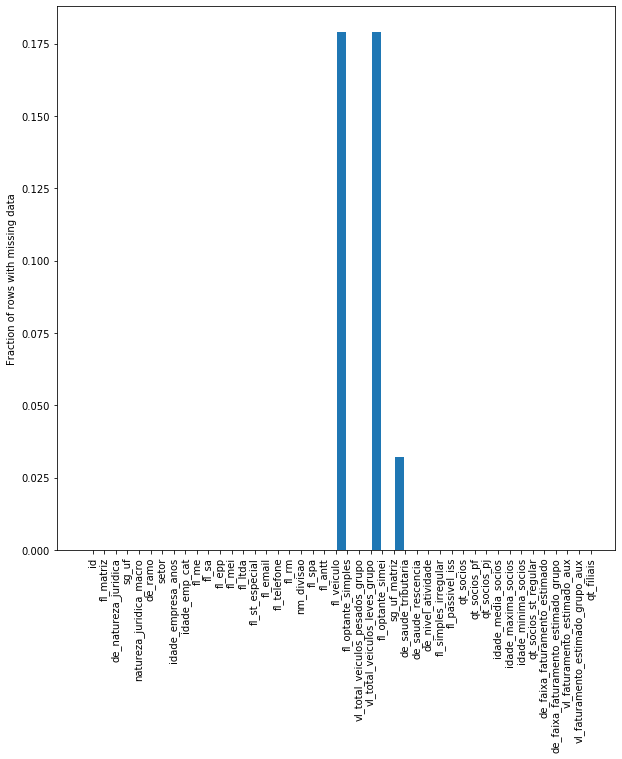

In [109]:
null_counts = dfem.isnull().sum()/len(dfem)
plt.figure(figsize = (10, 10))
plt.xticks(np.arange(len(null_counts))+0.5, null_counts.index, rotation = 'vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)), null_counts);

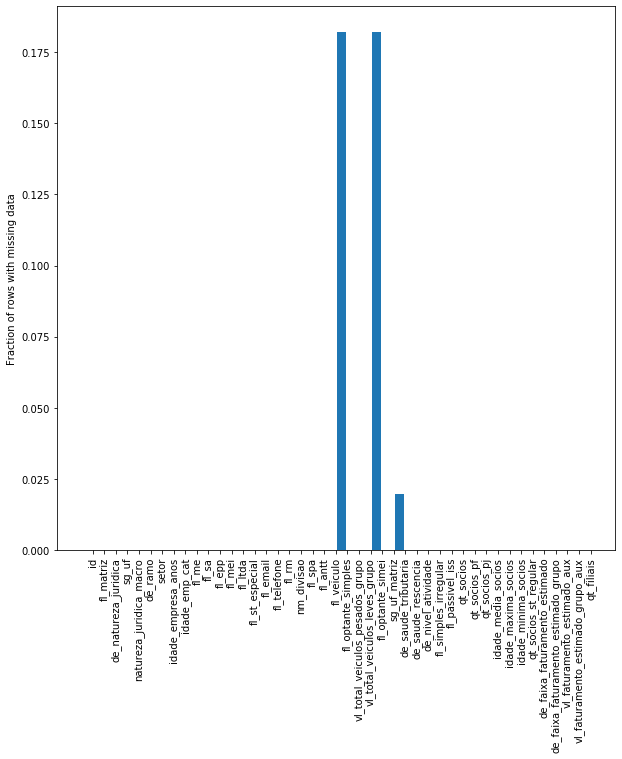

In [110]:
null_counts = dfp1.isnull().sum()/len(dfp1)
plt.figure(figsize = (10, 10))
plt.xticks(np.arange(len(null_counts))+0.5, null_counts.index, rotation = 'vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)), null_counts);

In [111]:
#pca = PCA().fit(dfem.dropna())
#evr = pca.explained_variance_ratio_
#evr